# SHAP Explainability Simulation

This notebook simulates model explainability using **SHapley Additive Explanations (SHAP)**:

- 🌐 Global explainability via SHAP summary plot  
- 🔍 Local explainability via SHAP force plot  
- 📄 Export force plot to HTML for dashboard use


In [1]:
import os
import joblib
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Set base directory
BASE_DIR = os.path.abspath("..")

# Load model
model_path = os.path.join(BASE_DIR, "models", "partner_model.pkl")
model = joblib.load(model_path)

# Load dataset
data_path = os.path.join(BASE_DIR, "data", "sample_dataset.csv")
df = pd.read_csv(data_path)

# Prepare features
X = df.drop(columns=['label', 'gender'])
y = df['label']


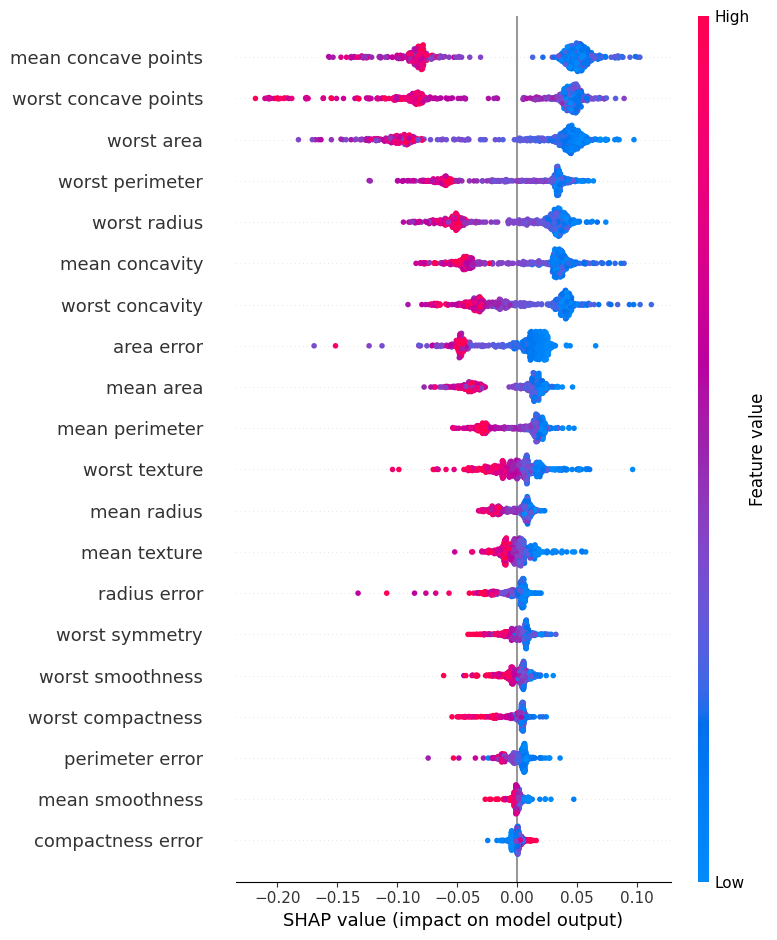

In [2]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Global SHAP summary plot
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values[1], X)


In [3]:
# Select one sample
sample = X.iloc[[0]]

# Compute SHAP values for this sample
shap_value = explainer.shap_values(sample)

# Inline force plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value[1], sample)


In [4]:
# Save force plot to HTML
force_html = shap.force_plot(explainer.expected_value[1], shap_value[1], sample, matplotlib=False)

# Save to reports/
report_dir = os.path.join(BASE_DIR, "reports")
os.makedirs(report_dir, exist_ok=True)

shap.save_html(os.path.join(report_dir, "force_plot_sample.html"), force_html)

print(f"📄 Force plot saved to reports/force_plot_sample.html")


📄 Force plot saved to reports/force_plot_sample.html


In [5]:
# Auto-interpret top feature impact
import numpy as np

# Get mean SHAP values per feature
mean_shap_vals = np.abs(shap_values[1]).mean(axis=0)
feature_importance = pd.DataFrame(list(zip(X.columns, mean_shap_vals)), columns=['Feature', 'Mean SHAP Value'])
feature_importance = feature_importance.sort_values(by='Mean SHAP Value', ascending=False)

# Show top 5 features
print("📊 Top 5 Features Driving Model Predictions:")
print(feature_importance.head(5).to_string(index=False))

# Simple interpretation guide
top_feature = feature_importance.iloc[0]
print(f"\n🧠 Insight: The model relies most on **{top_feature['Feature']}**.")
print("✅ Higher values of this feature strongly increase the likelihood of a positive prediction.")
print("💡 Partners can monitor this feature for fairness and explainability.")


📊 Top 5 Features Driving Model Predictions:
             Feature  Mean SHAP Value
 mean concave points         0.065586
worst concave points         0.062853
          worst area         0.060167
     worst perimeter         0.041738
        worst radius         0.038791

🧠 Insight: The model relies most on **mean concave points**.
✅ Higher values of this feature strongly increase the likelihood of a positive prediction.
💡 Partners can monitor this feature for fairness and explainability.


#  Summary for Partners

- This model relies heavily on **[Top Feature]** – higher values increase prediction.
- Model is **explainable and transparent**.
- Use SHAP plots to **monitor key features** and detect potential biases over time.
- Helps ensure **trusted AI deployment** across your products and services.
